In [ ]:
# Set up autoreload of external .py files
%reload_ext autoreload
%autoreload 2

# Setup tensorboard session

%load_ext tensorboard

# Import dependencies

from dataloader import DataLoader
from datadownloader import download_url
from model import ColorizationModel
import tensorflow as tf
import random

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
# Download and unzip datasets

download_url('http://data.csail.mit.edu/places/places365/test_256.tar', 'train')
download_url('http://data.csail.mit.edu/places/places365/val_256.tar', 'val')

train.tar already exists, skipping downloading.
train.tar already untarred, skipping untarring.
val.tar already exists, skipping downloading.
val.tar already untarred, skipping untarring.


In [10]:
# Initialize the train_data and val_data sequence data loaders

train_data = DataLoader('../Dataset/train')
val_data = DataLoader('../Dataset/val')

In [32]:
# Initialize the model

model = ColorizationModel(train_data, val_data)

In [33]:
# Train the model
# Change the second input depending on current epoch (resume training)

model.train_model(250, 0)

Epoch 1/250
  71/2566 [..............................] - ETA: 47:16 - loss: 0.1956 - mean_absolute_error: 0.1956

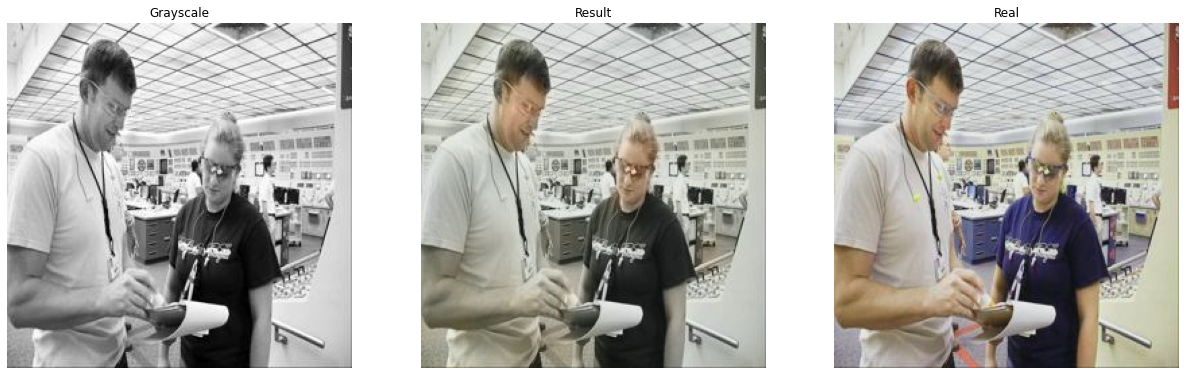

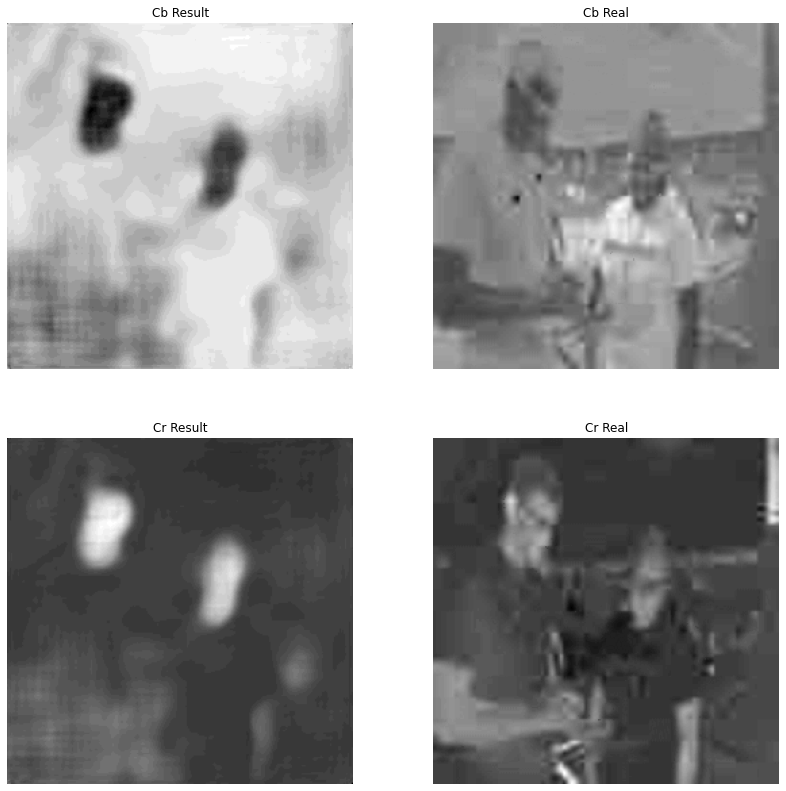

In [31]:
# Test a random validation image
# model.load_weights('../checkpoints/bestweights.hdf5')
model.test_image(random.choice(val_data.im_paths), './test.jpg')

In [ ]:
# Tells you if you have a GPU available for training

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))